In [10]:
chunk = 600
method = "wpli2_debiased"
bound = True

# Plotting target PLI figures

network 4

In [11]:
#%%
import time
import helper_functions as hf
import differentialevolution_par_scinet as df
import numpy as np
import mne 
import matplotlib.pyplot as plt

def make_symmetric(mat):
    n_mat = np.ndarray.copy(mat)
    for r in range(n_mat.shape[0]):
        for c in range(n_mat.shape[0]):
            n_mat[c,r] = n_mat[r,c]
    return n_mat

nodes= 10
num_dim = int((((nodes**2)-nodes)/2))

seed_tract = 123
rng = np.random.RandomState(seed_tract)
t_mat_v = rng.uniform(low = 1,high=50, size=(num_dim))
tract_mat = hf.p2matrix(t_mat_v, nodes)

# constant w_mat matches where tract_mat is 0
w_mat = np.ones((nodes,nodes))
zero_ind = tract_mat==0
w_mat[zero_ind] =0
np.fill_diagonal(w_mat,0)

#cv matrix
c_mat = np.ones((nodes,nodes))*500
c_mat = np.reciprocal(c_mat)
np.fill_diagonal(c_mat,0)

#simulating network
#WILSON-COWAN PARAMS 

"""Set seed for the wc_model_sim in the residuals fxn (so all potential 
solutions get tested with same noise variable)"""
wc_seed = 0
wc_params = {
        'c1': 1.6,
        'c2': -4.7,
        'c3': 3,
        'c4': -0.63,
        'I_e': 1.8,
        'I_i': -0.2,
        'g': 0.05,
        'time_steps': 2000,
        'dt': 0.01,
        'd': 0,
        'constant': True
        }

#signal properties
_Dt = wc_params['dt']
_alpha = 10
_dt = _Dt/_alpha # time step is 1ms: _dt = 0.001 #0.002
fs = 1/_dt # Sampling rate, or number of measurements per second

ue_array, ui_array, delays = hf.wcm.wc_model_sim_new(wc_params, tract_mat, c_mat, w_mat, nodes,
                                       seed_num = wc_seed)
#PLI

ue_targ_chunks= []
num_chunks = int(1800/chunk)

for ch in range(num_chunks):
    ue_targ_chunks.append(ue_array[:,200:][:,ch*chunk:ch*chunk + chunk])

if bound:
    _con1, _freqs, _times, _n_epochs, _n_tapers = mne.connectivity.spectral_connectivity(
        data=ue_targ_chunks,method=method, sfreq=fs, fmin = 13, fmax = 30, faverage = True,
        mode = 'fourier', verbose= True)
else:
    _con1, _freqs, _times, _n_epochs, _n_tapers = mne.connectivity.spectral_connectivity(
        data=ue_targ_chunks,method=method, sfreq=fs, faverage = True,
        mode = 'fourier', verbose= True)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: Debiased WPLI Square
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


0.974410470831
0.240305091895


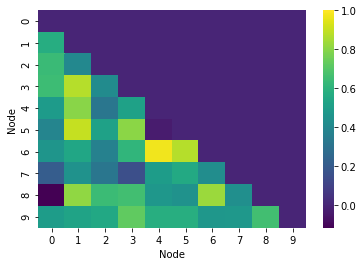

In [12]:
import seaborn as sns
%matplotlib inline
sns.heatmap(_con1[:,:,0], cmap = "viridis", vmax =1)
plt.xlabel("Node")
plt.ylabel("Node")
print(np.max(_con1[:,:,0]))
print(np.average(_con1[:,:,0]))


network 5

In [13]:
#%%
import time
import helper_functions as hf
import differentialevolution_par_scinet as df
import numpy as np

def make_symmetric(mat):
    n_mat = np.ndarray.copy(mat)
    for r in range(n_mat.shape[0]):
        for c in range(n_mat.shape[0]):
            n_mat[c,r] = n_mat[r,c]
    return n_mat

nodes= 10
num_dim = int((((nodes**2)-nodes)/2))

seed_tract = 123
rng = np.random.RandomState(seed_tract)
t_mat_v = rng.uniform(low = 1,high=50, size=(num_dim))
tract_mat = hf.p2matrix(t_mat_v, nodes)

# constant w_mat matches where tract_mat is 0
w_mat = np.ones((nodes,nodes))
zero_ind = tract_mat==0
w_mat[zero_ind] =0
np.fill_diagonal(w_mat,0)

#cv matrix
seed2 = 200
rng = np.random.RandomState(seed2)
c_mat_v = rng.uniform(low = 500,high=10000, size=(num_dim))
c_mat = hf.p2matrix(c_mat_v, nodes)
c_mat = np.reciprocal(c_mat)
np.fill_diagonal(c_mat,0)

#simulating network
#WILSON-COWAN PARAMS 

"""Set seed for the wc_model_sim in the residuals fxn (so all potential 
solutions get tested with same noise variable)"""
wc_seed = 0
wc_params = {
        'c1': 1.6,
        'c2': -4.7,
        'c3': 3,
        'c4': -0.63,
        'I_e': 1.8,
        'I_i': -0.2,
        'g': 0.05,
        'time_steps': 2000,
        'dt': 0.01,
        'd': 0,
        'constant': True
        }

ue_array, ui_array, delays = hf.wcm.wc_model_sim_new(wc_params, tract_mat, c_mat, w_mat, nodes,
                                       seed_num = wc_seed)
#PLI

ue_targ_chunks= []
num_chunks = int(1800/chunk)

for ch in range(num_chunks):
    ue_targ_chunks.append(ue_array[:,200:][:,ch*chunk:ch*chunk + chunk])


if bound:
    _con2, _freqs, _times, _n_epochs, _n_tapers = mne.connectivity.spectral_connectivity(
        data=ue_targ_chunks,method=method, sfreq=fs, fmin = 13, fmax = 30, faverage = True,
        mode = 'fourier', verbose= True)
else:
    _con2, _freqs, _times, _n_epochs, _n_tapers = mne.connectivity.spectral_connectivity(
        data=ue_targ_chunks,method=method, sfreq=fs, faverage = True,
        mode = 'fourier', verbose= True)

/scinet/niagara/software/2018a/opt/base/anaconda3/5.1.0-hub/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in reciprocal


Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: Debiased WPLI Square
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


0.73395346523
-0.00250389852454


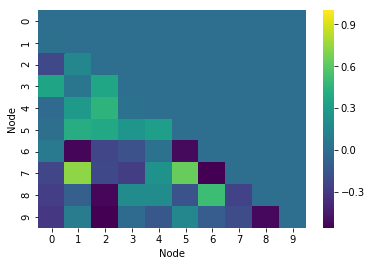

In [18]:
import seaborn as sns
%matplotlib inline
sns.heatmap(_con2[:,:,0], cmap = "viridis", vmax = 1)
plt.xlabel("Node")
plt.ylabel("Node")

print(np.max(_con2[:,:,0]))
print(np.average(_con2[:,:,0]))


In [ ]:
sns.heatmap(np.abs(_con1[:,:,0]-_con2[:,:,0]), cmap = "viridis")
np.average(np.abs(_con1[:,:,0]-_con2[:,:,0]))

In [ ]:
import matplotlib.pyplot as plt
plt.hist(np.abs(_con1[:,:,0]-_con2[:,:,0]))
plt.show()

network 6

In [15]:
#%%
import time
import helper_functions as hf
import differentialevolution_par_scinet as df
import numpy as np

def make_symmetric(mat):
    n_mat = np.ndarray.copy(mat)
    for r in range(n_mat.shape[0]):
        for c in range(n_mat.shape[0]):
            n_mat[c,r] = n_mat[r,c]
    return n_mat

nodes= 10
num_dim = int((((nodes**2)-nodes)/2))

seed_tract = 123
rng = np.random.RandomState(seed_tract)
t_mat_v = rng.uniform(low = 1,high=50, size=(num_dim))
tract_mat = hf.p2matrix(t_mat_v, nodes)

# constant w_mat matches where tract_mat is 0
w_mat = np.ones((nodes,nodes))
zero_ind = tract_mat==0
w_mat[zero_ind] =0
np.fill_diagonal(w_mat,0)

#cv matrix
c_mat = np.ones((nodes,nodes))*10000
c_mat = np.reciprocal(c_mat)
np.fill_diagonal(c_mat,0)

#simulating network
#WILSON-COWAN PARAMS 

"""Set seed for the wc_model_sim in the residuals fxn (so all potential 
solutions get tested with same noise variable)"""
wc_seed = 0
wc_params = {
        'c1': 1.6,
        'c2': -4.7,
        'c3': 3,
        'c4': -0.63,
        'I_e': 1.8,
        'I_i': -0.2,
        'g': 0.05,
        'time_steps': 2000,
        'dt': 0.01,
        'd': 0,
        'constant': True
        }

ue_array, ui_array, delays = hf.wcm.wc_model_sim_new(wc_params, tract_mat, c_mat, w_mat, nodes,
                                       seed_num = wc_seed)

#PLI

ue_targ_chunks= []
num_chunks = int(1800/chunk)

for ch in range(num_chunks):
    ue_targ_chunks.append(ue_array[:,200:][:,ch*chunk:ch*chunk + chunk])

if bound:
    _con3, _freqs, _times, _n_epochs, _n_tapers = mne.connectivity.spectral_connectivity(
        data=ue_targ_chunks,method=method, sfreq=fs, fmin = 13, fmax = 30, faverage = True,
        mode = 'fourier', verbose= True)
else:
    _con3, _freqs, _times, _n_epochs, _n_tapers = mne.connectivity.spectral_connectivity(
        data=ue_targ_chunks,method=method, sfreq=fs, faverage = True,
        mode = 'fourier', verbose= True)

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: Debiased WPLI Square
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


Text(33,0.5,'Node')

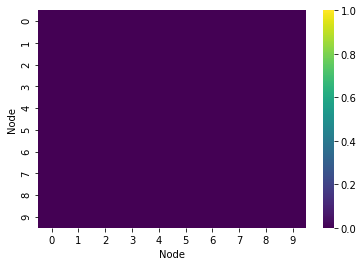

In [16]:
import seaborn as sns
%matplotlib inline
sns.heatmap(_con3[:,:,0], vmin = 0, vmax = 1, cmap = "viridis")
plt.xlabel("Node")
plt.ylabel("Node")

# Testing the scripts

In [ ]:
exec(open("/scratch/l/lfefebvr/noorir/model/load_genvars_delays4----4.py").read()) 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(targ_data, cmap = "viridis", vmax = 1)
plt.show()

plt.figure(3, figsize=(15,6))
for sing_node in range(nodes):
    plt.plot(ue_array[sing_node], '-k', linewidth=0.2)
avg = np.mean(ue_array, axis= 0 )
plt.plot(avg, '-k', linewidth = 0.8)
plt.xlabel("Time (ms)", fontsize = "xx-large")
plt.ylabel("$u_e$", fontsize = "xx-large")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()



In [ ]:
import differentialevolution_par_scinet as df

df.differential_evolution(hf.residuals_pli, args = args,
                              strategy = evol_params['strategy'],
                              popsize = 5,
                              mutation = evol_params['mut'],
                              recombination = evol_params['recomb'],
                              bounds = evol_params['bounds'],
                              tol = evol_params['tol'],
                              maxiter = 3,
                              disp = True,
                              polish = evol_params['polish'],
                              mse_thresh = evol_params['mse'],
                              atol = evol_params['atol'],
                              init = evol_params['init'],
                              prior= evol_params['prior'], jobid = 111, rank = 0)

#### DOES NOT WORK BC DF FILE HAS MPI COMMANDS- TEST IN DEBUGGER IN COMMAND LINE

In [ ]:
exec(open("/scratch/l/lfefebvr/noorir/model/load_genvars_delays5----5.py").read()) 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(targ_data, cmap = "viridis", vmax = 0.8)
plt.show()

plt.figure(3, figsize=(15,6))
for sing_node in range(nodes):
    plt.plot(ue_array[sing_node], '-k', linewidth=0.2)
avg = np.mean(ue_array, axis= 0 )
plt.plot(avg, '-k', linewidth = 0.8)
plt.xlabel("Time (ms)", fontsize = "xx-large")
plt.ylabel("$u_e$", fontsize = "xx-large")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [ ]:
exec(open("/scratch/l/lfefebvr/noorir/model/load_genvars_delays6---6.py").read()) 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.heatmap(targ_data, cmap = "viridis", vmax = 0.8)
plt.show()

plt.figure(3, figsize=(15,6))
for sing_node in range(nodes):
    plt.plot(ue_array[sing_node], '-k', linewidth=0.2)
avg = np.mean(ue_array, axis= 0 )
plt.plot(avg, '-k', linewidth = 0.8)
plt.xlabel("Time (ms)", fontsize = "xx-large")
plt.ylabel("$u_e$", fontsize = "xx-large")
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Testing new function

In [3]:
import numpy as np
import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
import scipy.signal
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import argrelextrema
import random
import sklearn.preprocessing as pr
from scipy import signal
#from scipy.optimize import differential_evolution
from numpy import linalg as LA
import numexpr as ne
from math import exp
import time
import mne
import helper_functions as hf

import wc_model_sim_functions as wcm


def residuals_pli_corr(c, params, fs, nodes, targ_data_corr, targ_data_pli, 
                       w_mat, chunk, skip, seed, optim, 
                       tract_mat, heavi, fmin, fmax, plot = False):          
                       
    """
    This function is used to optimize the network model based on the
    PLI & Correlation matrix
    
    c: vector that you are trying to optimize - e.g. weights matrix converted
    to a vector- RIGHT NOW IT ONLY WORKS WITH CONDUCTION VELOCITY
    
    params: dict containing the wc and simulation params for the population
    models at each node; contains c1, c2, c3, c4, I_e, I_i, dt, time_steps, d
    """
    
    ind = 0
    cmat = np.ones((nodes, nodes))
    
    for row in range(0,nodes):
        for col in range(row+1, nodes):
            cmat[row,col] = c[ind]
            cmat[col,row] = c[ind]
            ind += 1
    if type(cmat[0,0]) != type(1.0):
        cmat =cmat*1.0
    cmat_old = np.ndarray.copy(cmat)
    cmat = np.reciprocal(cmat, where= cmat>0.0)
    np.fill_diagonal(cmat,0)

    ue_array, _, delays = wcm.wc_model_sim_new(params, tract_mat, cmat, w_mat, 
                                               nodes, seed_num = seed)    
   
    #PLI
    exp_data_pli = plot_avg_pli(ue_array,chunk, params['time_steps'], skip, fs, fmin, fmax)
    
    exp_data_p = matrix2p(exp_data_pli, upper = False)
    targ_data_p = matrix2p(targ_data_pli, upper = False)#lower triang matrix
    
    #quantity we are trying to minimize is the mse 
    res_pli = mse(targ_data_p,exp_data_p)
    
    
    #correlation
    exp_data_corr = plot_cor_mat(ue_array, nodes, skip)
    res_corr = mse(np.triu(targ_data_corr,1).ravel(),np.triu(exp_data_corr,1).ravel())
    
    final_res = res_corr+ res_pli
    if plot:
        np.fill_diagonal(cmat_old,0)
        return(cmat_old/1000, ue_array, final_res, exp_data_pli, exp_data_corr)
        
    return final_res

In [4]:
def make_symmetric(mat):
    n_mat = np.ndarray.copy(mat)
    for r in range(n_mat.shape[0]):
        for c in range(n_mat.shape[0]):
            n_mat[c,r] = n_mat[r,c]
    return n_mat

nodes= 10
num_dim = int((((nodes**2)-nodes)/2))

seed_tract = 123
rng = np.random.RandomState(seed_tract)
t_mat_v = rng.uniform(low = 1,high=50, size=(num_dim))
tract_mat = hf.p2matrix(t_mat_v, nodes)

# constant w_mat matches where tract_mat is 0
w_mat = np.ones((nodes,nodes))
zero_ind = tract_mat==0
w_mat[zero_ind] =0
np.fill_diagonal(w_mat,0)

#cv matrix
c_mat = np.ones((nodes,nodes))*500
c_mat = np.reciprocal(c_mat)
np.fill_diagonal(c_mat,0)

#simulating network
#WILSON-COWAN PARAMS 

"""Set seed for the wc_model_sim in the residuals fxn (so all potential 
solutions get tested with same noise variable)"""
wc_seed = 0
wc_params = {
        'c1': 1.6,
        'c2': -4.7,
        'c3': 3,
        'c4': -0.63,
        'I_e': 1.8,
        'I_i': -0.2,
        'g': 0.05,
        'time_steps': 2000,
        'dt': 0.01,
        'd': 0,
        'constant': True
        }

ue_array, ui_array, delays = hf.wcm.wc_model_sim_new(wc_params, tract_mat, c_mat, w_mat, nodes,
                                       seed_num = wc_seed)


#correlation matrix
skip = 200
targ_data_corr = hf.plot_cor_mat(ue_array, nodes, skip)
np.fill_diagonal(targ_data_corr, 0)

#PLI
import mne

#signal properties
_Dt = wc_params['dt']
_alpha = 10
_dt = _Dt/_alpha # time step is 1ms: _dt = 0.001 #0.002
fs = 1/_dt # Sampling rate, or number of measurements per second

chunk = 600
method = "wpli"
fmin = 13
fmax = 30

ue_targ_chunks= []
num_chunks = int(1800/chunk)

for ch in range(num_chunks):
    ue_targ_chunks.append(ue_array[:,skip:][:,ch*chunk:ch*chunk + chunk])


_con, _freqs, _times, _n_epochs, _n_tapers = mne.connectivity.spectral_connectivity(
    data=ue_targ_chunks,method=method, sfreq=fs, fmin = fmin, fmax = fmax, faverage = True,
    mode = 'fourier', verbose= True)


targ_data_pli = _con[:,:,0]

Connectivity computation...
only using indices for lower-triangular matrix
    computing connectivity for 45 connections
    using t=0.000s..0.599s for estimation (600 points)
    frequencies: 13.3Hz..30.0Hz (11 points)
    connectivity scores will be averaged for each band
    using FFT with a Hanning window to estimate spectra
    the following metrics will be computed: WPLI
    computing connectivity for epoch 1
    computing connectivity for epoch 2
    computing connectivity for epoch 3
    assembling connectivity matrix (filling the upper triangular region of the matrix)
[Connectivity computation done]


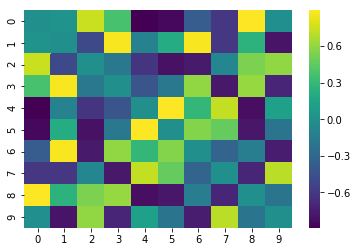

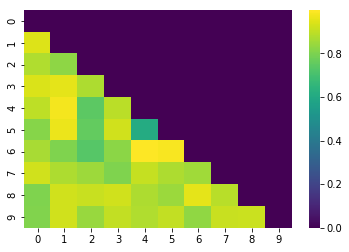

In [7]:
import seaborn as sns
%matplotlib inline


sns.heatmap(targ_data_corr, cmap= "viridis")
plt.show()

sns.heatmap(targ_data_pli, cmap = "viridis")
plt.show()

In [ ]:
#%% ARGS FOR RESIDUAL FXN IN DIFF EVOLUTION ALROGITHM

args = (wc_params, fs, nodes, targ_data_corr, targ_data_pli, w_mat, chunk, skip, wc_seed, evol_params['optim'], tract_mat, evol_params['heavi'], fmin, fmax)